## Muestreo de Gibbs y aplicaciones de cadenas de Markov en física estadística

En nuestra lección anterior:
- Establecimos el teorema ergódico para cadenas Markov.
  * El teorema establece que en el límite de tiempo largo, el promedio temporal evaluado a lo largo de una trayectoria de una de cadena de Markov converge el promedio de ensamble bajo la distribución estacionaria.
  * El teorema es increíblemente útil en ambos sentidos, i.e., cuando deseo conocer el promedio temporal utilizo el promedio de ensamble y vicerversa, dependiendo cuál cantidad sea accesible para describir el problema.
  * Planteamos que para que el teorema ergódico se cumpla, la cadena de Markov debe ser aperiódica e irreducible.
- La descomposición de la matriz de transición $\mathbf{Q}$ en su base de autovectores nos deja expresar cualquier distribución como una combinación lineal de autovectores, la cual nos lleva a la conclusión de que el estado estacionario corresponde al autovector con autovalor 1, de acuerdo con el teorema de Perron-Frobenius.
- El método de Metropolis-Hastings nos entrega un algoritmo para obtener **distribuciones de equilibrio cuando el espacio de configuración de cierto sistema no puede ser muestreado de forma tratable**.

### Muestreo de Gibss

El muestreo de Gibbs corresponde a la versión **más utilizada del método de Metropolis-Hastings (MH)**.
- La conexión entre el método MH y el muestreo de Gibbs es sutil.
  * Ambos corresponden a métodos de Monte Carlo tipo cadenas de Markov.
  * Ambos corresponden a métodos para obtener distribuciones estacionarias objetivo $\vec{P}^*$.
  * Sin embargo, difieren en la forma en que **proponen y aceptan nuevos estados de forma iterativa**.

Sea $\mathbf{X} = (X_1, \cdots, X_n)$ un vector aleatorio con PMF $p(\mathbf{x})$ que debe ser especificada módulo una constante multiplicativa arbitraria. 
- En nuestras lecciones anteriores, habíamos llamado $\vec{P}(t)$ a la PMF de la distribución al tiempo $t$. La notación anterior será más útil para la discusión del muestreo de Gibbs. $p(\mathbf{x})$ corresponde a $\vec{P}(t)$ para algún valor de $t$ que será irrelevante en nuestra discusión.

Suponga que deseamos generar un vector aleatorio cuya distribución corresponde con $\mathbf{X}$. El muestreo de Gibbs permite obtener este resultado módulo una constante arbitraria.

- El muestreo de Gibbs asume que para cualquier $i$ y valores $x_j$, $j \neq i$, podemos generar una variable aleatoria $X$ con PMF
$$
P\{ X = x \} = P\{ X_i = x | X_j = x_j, j \neq i \}.
$$

El método opera usando el algoritmo MH, con una cadena de Markov con estados $\mathbf{x} = (x_1, \cdots, x_n)$ pero con **una distinta definición de las probabilidades de transición**. Las probabilidades de transición se definen de la siguiente forma:
- Dado el estado presente $\mathbf{x}$, se escoje una coordenada $1, \cdots, n$.
  * La coordenada se puede escoger **de forma aleatoria o de forma secuencial.**
- Si se escoje la coordenada $i$, se genera una variable aleatoria $X$ con PMF
  $$
  P\{ X = x \} = P\{ X_i = x | X_j = x_j, j \neq i \}.
  $$
- En el paso anterior, llamamos a $x$ el valor que toma la variable aleatoria $X$ con el procedimiento anterior, i.e., $X = x$. La coordenada $j$, en principio, es arbitraria; sin embargo, en modelos físicos se suele escoger de **acuerdo a la localidad del problema**.
- Entonces el estado $\mathbf{y} = (x_1, \cdots, x_{i-1}, x, x_{i+1}, \cdots, x_n)$ se considera un **candidato para ser el siguiente estado**.
- Con respecto a nuestro análisis de cadenas de Markov, debemos entender a $\mathbf{y}$ como **la siguiente distribución de probabilidad en una cadena de Markov partiendo de la distribución $\mathbf{x}$**.
- Esto implica que la PMF anterior nos da la probabilidad de transición
  $$
  q(\mathbf{x}, \mathbf{y}) = \frac{1}{n} P\{ X_i = x | X_j = x_j, j \neq i \}
  $$
- Note el cambio de nomenclatura con respecto a la lección anterior: en este caso usamos esta notación porque es más sencillo resaltar de esta forma que el cambio de un estado a otro en la cadena de Markov corresponde a un **cambio de un valor local** de $\mathbf{x}$. El factor $1 / n$ normaliza la probabilidad de transición. 
- Recuerde que $P(A | B) = P(AB) / P(B)$, lo cual en este caso se manifiesta de la forma
  $$
  \boxed{q(\mathbf{x}, \mathbf{y}) = \frac{p(\mathbf{y})}{n P\{ X_j = x_j\}}}
  $$



#### Probabilidad de aceptación del estado $\mathbf{y}$

Recordamos que para el método MH, la probabilidad de aceptación del nuevo estado es 
$$
\alpha_{ij} = {\textrm{min}}\Bigg( \frac{P^*_j Q_{ij}}{P^*_i Q_{ji}}, 1 \Bigg) = {\textrm{min}}\Bigg( \frac{b_j Q_{ij}}{b_i Q_{ji}}, 1 \Bigg).
$$

En este caso, dado que $p$ corresponde a la distribución estacionaria deseada, vemos que el estado $\mathbf{y}$ se acepta con probabilidad
\begin{align}
\alpha(\mathbf{x}, \mathbf{y}) &= {\textrm{min}}\Bigg( \frac{p(\mathbf{y}) q(\mathbf{y}, \mathbf{x})}{p(\mathbf{x}) q(\mathbf{x}, \mathbf{y})}, 1 \Bigg) \\
&= {\textrm{min}}\Bigg( \frac{p(\mathbf{y}) p(\mathbf{x})}{p(\mathbf{x}) p(\mathbf{y})}, 1 \Bigg) \\
&= 1.
\end{align}

Es decir, el candidato **siempre se acepta**. Esto implica que el método de muestreo de Gibbs es superior para ciertos sistemas, particularmente para aquellos donde usar el MH con una propuesta incorrecta resuelta en una tasa de rechazo muy alta. 

#### Diferencias entre el método Metropolis-Hastings estándar y el muestreo de Gibbs

Podemos notar que ambos métodos son muy similares. Sin embargo,
- **la sutil diferencia yace en que con el MH la actualización de una realización a otra ocurre a nivel del estado de forma global, mientras que con el muestreo de Gibbs la actualización ocurre localmente sobre cada elemento del estado**.
- Adicionalmente, el muestreo de Gibbs corresponde a un caso especial de MH, en el cual la propuesta **siempre se acepta**.
- *Where's the catch?* Para el caso del muestreo de Gibbs, **se debe conocer la distribución condicional de las variables**. Para nuestro beneficio, muchos problema en la física caen dentro de esta categoría.

### Ejemplo: Muestreo de Gibbs aplicado a un campo escalar 1-D acoplado

Considere una cadena periódica de $N$ variables reales $x_1,\dots,x_N$ (campo escalar 1-D con condiciones periódicas).  
La energía del sistema (Hamiltoniano) es cuadrática y local:
$$
H(\mathbf{x}) \;=\; \frac{1}{2}\sum_{i=1}^N (x_i - x_{i+1})^2 \;+\; \frac{m^2}{2}\sum_{i=1}^N x_i^2,
\qquad x_{N+1}\equiv x_1,
$$
donde $m^2 \ge 0$ corresponde a un término de masa.
A temperatura $T$ (o temperatura inversa $\beta = 1/T$), la distribución estacionaria debería ser una distribución de equilibrio dada por la distribución de Boltzmann:
$$
p(\mathbf{x}) \propto \exp\big(-\beta H(\mathbf{x})\big).
$$
Nuestro objetivo es realizar un muestreo de Gibbs que actualiza $x_i$ según la probabilidad condicional
$$
p(x_i \mid \mathbf{x}_{\setminus i}),
$$
donde $\setminus i$ corresponde a la *diferencia en el conjunto*, i.e., los componentes de $\mathbf{x}$ que no están presentes en $i$.

De esta manera podemos simular la cadena de Markov y comparar resultados numéricos con la teoría. **Note que en este caso tenemos distribuciones de probabilidad continuas**. A pesar de esto, podemos hacer nuestro análisis en analogía con el caso discreto. Adicionalmente, en la computadora todas las distrbuciones se representan de forma discreta.

#### Cálculo de la probabilidad condicional completa (Gaussianas exactas)

Para este caso en particular, podemos evaluar la distribución condicional de las variables. Recuerde que este paso **es necesario para poder aplicar el muestreo de Gibbs**.

La energía sólo contiene términos locales que involucran $x_i$ y sus vecinos $x_{i-1}, x_{i+1}$. Los términos que dependen de $x_i$ son:
$$
\frac{1}{2}(x_i-x_{i-1})^2 + \frac{1}{2}(x_i-x_{i+1})^2 + \frac{m^2}{2}x_i^2.
$$
Podemos desarrollar esta suma y al ignorar términos que no dependen de $x_i$ obtenemos:
$$
H_{\text{loc}}(x_i) = \Big(1+\tfrac{m^2}{2}\Big) x_i^2 \;-\; x_i(x_{i-1}+x_{i+1}).
$$
Definamos $a \equiv 1 + \tfrac{m^2}{2}$ y $b \equiv x_{i-1}+x_{i+1}$. Entonces
$$
H_{\text{loc}}(x_i) = a x_i^2 - b x_i
$$
Este es el término de energía local. Recordemos que deseamos la **probabilidad condicional** de $x_i$ dado su complemento. 
Desde una perspectiva física, el término de energía local debe ser el único término involucrado en este cálculo. Dejando factores constantes de lado, tenemos:
$$
\pi(x_i\mid \mathbf{x}_{\setminus i}) \propto \exp\big(-\beta H_{\text{loc}}(x_i)\big)
= \exp\Big(-\beta\big[a x_i^2 - b x_i\big]\Big),
$$
Esta es la distribución Gaussiana en $x_i$. Los indicadores de la distribución se pueden observar completando el cuadrado. Tenemos:
$$
a x_i^2 - b x_i = a \Bigg( x_i^2 - \frac{b}{a}x_i \Bigg) = a \Bigg[ \Big(x_i - \frac{b}{2a} \Big)^2 - \Big( \frac{b}{2a} \Big)^2 \Bigg],
$$
de manera tal que el exponente corresponde a
$$
-\beta\big[a x_i^2 - b x_i\big] = -\beta a \Big(x_i - \frac{b}{2a} \Big)^2 + \beta a \Big( \frac{b}{2a} \Big)^2.
$$
Note que el segundo término es constante con respecto a $x_i$ entonces solo afecta la normalización, la cual es irrelevante para el método de muestreo de Gibss. Entonces:
$$
\boxed{\pi(x_i\mid \mathbf{x}_{\setminus i}) \propto \exp \Big( -\beta a \Big(x_i - \frac{b}{2a} \Big)^2 \Big)}.
$$
Con esto, sabemos que:
- Valor de expectación condicional
  $$
  E[x_i | \mathbf{x}_{\setminus i}] = \frac{b}{2a} = \frac{x_{i-1}+x_{i+1}}{2 + m^2}.
  $$
- Varianza condicional
  $$
  \text{var}[x_i | \mathbf{x}_{\setminus i}] = \frac{1}{2\beta a} = \frac{1}{\beta(2 + m^2)}.
  $$
Recordamos que necesitamos esta probabilidad condicional para evaluar el método de muestreo de Gibss.

#### Muestreo de Gibbs (dos variantes)

1. **Escaneo secuencial (determinista):** para $t = 0,1,\cdots$ se recorre $i = 1 \cdots N$ y se muestrea $x_i$ de su probabilidad condicional dada la configuración actual.
2. **Escaneo aleatorio:** en cada paso se elige un $i$ uniformemente en $\{1,\cdots,N\}$ y se actualiza $x_i$.

Ambos son muestreos de Gibbs válidos. En esta lección, implementaremos el escaneo secuencial.

#### Implementación

Realizaremos la implementación como se detalla a continuación. Implemente una función que realizar un paso del muestreo de Gibbs para el ejemplo anterior:

In [2]:
import numpy as np

def gibbsStep(x, beta, m):
    """
    Realiza un paso del muestreo de Gibbs secuencial
    para el campo escalar 1D con condiciones periódicas.

    Parámetros:
    -----------
    x : np.ndarray
        Configuración actual (vector de tamaño N)
    beta : float
        Inversa de la temperatura (1/T)
    m : float
        Parámetro de masa (NO al cuadrado, la función calculará m^2)

    Devuelve:
    ---------
    x_new : np.ndarray
        Nueva configuración después de un barrido de Gibbs
    """
    N = len(x)
    x_new = x.copy()

    m2 = m**2
    var = 1.0 / (beta * (2 + m2))
    std = np.sqrt(var)

    # Bucle secuencial sobre todos los sitios
    for i in range(N):
        xm = x_new[i - 1]          # vecino izquierdo (periodicidad natural)
        xp = x_new[(i + 1) % N]    # vecino derecho (condición periódica)
        mu = (xm + xp) / (2 + m2)  # media condicional
        x_new[i] = np.random.normal(mu, std)  # muestreo Gaussiano

    return x_new

Ahora definamos los parámetros del problema e invoquemos `gibbsStep` para generar una realización de la cadena de Markov una cantidad $N$ de veces. Para la condición inicial podemos considerar que $x_i = 0\; \forall i$.

In [44]:
nSites = 64
mVal = 1.0
betaVal = 1000.0
nSteps = 50_000

# Valor inicial
x = np.ones(nSites)*5

Ahora necesitamos una estructura de datos para guardar todas las realizaciones de la cadena de Markov que satisfacen el muestreo de Gibbs. Podemos usar:

In [45]:
samples = np.zeros((nSteps, nSites))

Ahora aplicamos `gibbsStep` en un `for loop` una cantidad de `nSteps` veces:

In [46]:
for step in range(nSteps):
    # Actualizamos la configuración usando un paso de Gibbs
    x = gibbsStep(x, betaVal, mVal)
    
    # Guardamos la nueva configuración en la matriz de muestras
    samples[step] = x

Estas realizaciones de cada paso de la cadena de Markov satisfacen el muestreo de Gibbs. Corresponden a posibles valores que puede tener el campo $\mathbf{x}$ que satisfacen nuestra condición de equilibrio. Sin embargo, la cantidad que satisface la distribución de Boltzmann es la **energía de la configuración**. Implemente una función que calcula la energía de cada configuración:

In [47]:
def energy(x, m):
    """
    Calcula la energía (Hamiltoniano) de una configuración x
    para el campo escalar 1D con condiciones periódicas.

    Parámetros:
    -----------
    x : np.ndarray
        Configuración actual del campo (vector de tamaño N)
    m : float
        Parámetro de masa (no al cuadrado)

    Devuelve:
    ---------
    E : float
        Energía total de la configuración
    """
    # Calcula x_{i+1} con condición periódica
    x_next = np.roll(x, -1)

    # Primer término: diferencias cuadradas entre vecinos
    diff_term = 0.5 * np.sum((x - x_next)**2)

    # Segundo término: masa
    mass_term = 0.5 * (m**2) * np.sum(x**2)

    # Energía total
    E = diff_term + mass_term
    return E


Ahora podemos calcular la energía de la configuración **de cada realización de la cadena de Markov**:

In [48]:
m = 1.0
energies = np.array([energy(s, m) for s in samples])

Y con esto realizar un histograma de la distribución de energías:

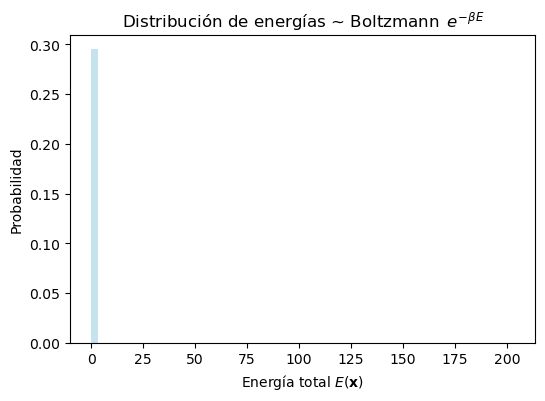

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(energies, bins=60, density=True, color='lightblue', alpha=0.7)
plt.xlabel('Energía total $E(\\mathbf{x})$')
plt.ylabel('Probabilidad')
plt.title('Distribución de energías ~ Boltzmann $\\, e^{-\\beta E}$')
plt.show()

Realice un gráfico como función del tiempo de algún valor $x_i$ ($i = N / 2$, por ejemplo). Observe el valor de la variable como función del tiempo. ¿Porqué se comporta de esa forma? ¿Cómo explica este comportamiento?

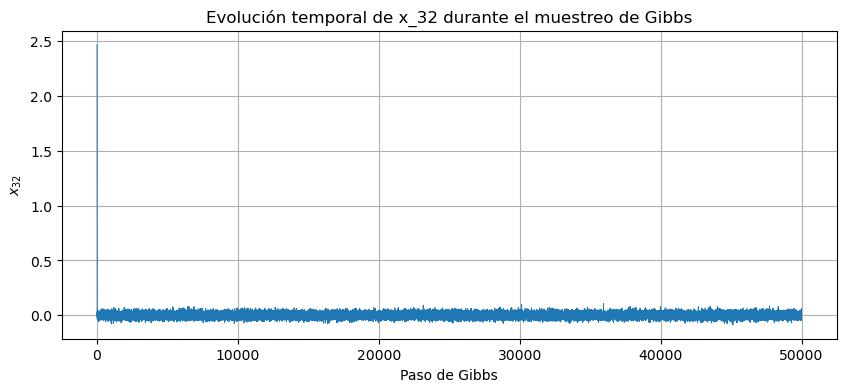

In [50]:
import matplotlib.pyplot as plt

# Índice del sitio a observar
i = nSites // 2

# Extraemos la evolución temporal de x_i
x_i_time = samples[:, i]

# Graficamos
plt.figure(figsize=(10,4))
plt.plot(range(nSteps), x_i_time, lw=0.7)
plt.xlabel("Paso de Gibbs")
plt.ylabel(f"$x_{{{i}}}$")
plt.title(f"Evolución temporal de x_{i} durante el muestreo de Gibbs")
plt.grid(True)
plt.show()


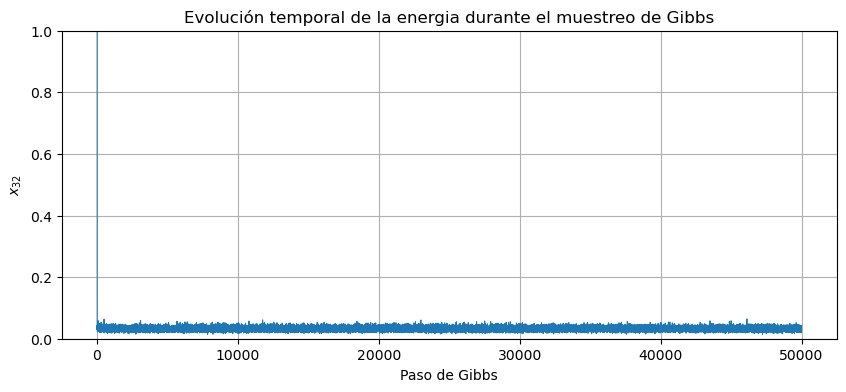

In [52]:
# Graficamos
plt.figure(figsize=(10,4))
plt.plot(range(nSteps), energies, lw=0.7)
plt.xlabel("Paso de Gibbs")
plt.ylabel(f"$x_{{{i}}}$")
plt.title(f"Evolución temporal de la energia durante el muestreo de Gibbs")
plt.grid(True)
plt.ylim(0,1)
plt.show()

In [53]:
print(energies)

[2.03485458e+02 5.03129685e+01 1.23706879e+01 ... 3.64973887e-02
 3.33026486e-02 2.92965028e-02]
